In [1]:
from math import sqrt
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, metrics
from collections import Counter


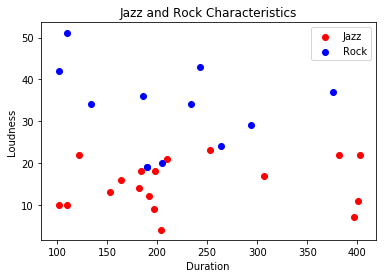

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

prediction_values = [250,50]
# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
X = music[['loudness', 'duration']].values
y = music['jazz'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


Below we will define our distance measurement(euclidean), sort our values, and retrieve our distances that are closest

0.7333333333333333


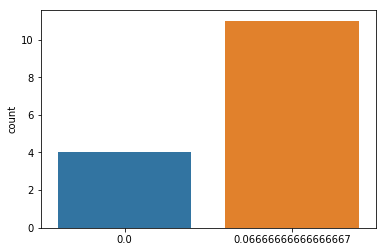

In [4]:
def knn(X_train, y_train, X_test, k):
    euclidean_distance = []
    predictions = []

    # Loop over the X_test samples we will predict
    for i in range(len(X_test)):
        # Loop over all the training examples, calculating the distance to the current sample
        # we're trying to predict
        eucdistance = []
        for j in range(len(X_train)):
            tmp = np.sqrt((X_test[i, 0]-X_train[j, 0])**2 + (X_test[i, 1]-X_train[j, 1])**2)
            eucdistance.append(tmp)
        k_nearest_idx = np.argsort(eucdistance)[:k]
        k_nearest_pred = y_train[k_nearest_idx]
        predictions.append(Counter(k_nearest_pred).most_common(1)[0][0])
    
    return predictions

prediction = knn(X_train, y_train, X_test, 5)

r_score = (y_test == prediction) / len(y_test)
print(r_score.sum())
sns.countplot(r_score);

Our algorithm predicted at 73% accuracy. The same as the sklearn version as can be seen below.

In [5]:
knn_2 = neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance')

knn_2.fit(X_train, y_train)

score = knn_2.score(X_test, y_test)
print(score.mean())

0.7333333333333333
